In [2]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pandas as pd
from tabulate import tabulate
import pandas as pd

In [3]:
order_items_df = pd.read_csv("./data/olist_order_items_dataset.csv")
products_df = pd.read_csv("./data/olist_products_dataset.csv")
merged_df = pd.merge(order_items_df, products_df, on="product_id", how="inner")
print("----Dataframe shapes----")
print(f'Order items: {order_items_df.shape}')
print(f'Products: {products_df.shape}')
print(f'Merged: {merged_df.shape}')
print()

merged_df = merged_df[['order_id', 'product_id', 'price', 'product_category_name']]
merged_df.rename(columns={merged_df.columns[2]:'profit'}, inplace=True)
merged_df.sample(10)


----Dataframe shapes----
Order items: (112650, 7)
Products: (32951, 9)
Merged: (112650, 15)



,order_id,product_id,profit,product_category_name
70559,c4e3b2e6f29f2e5ba28bd079aee75750,1e5b160bf180293380b0d3e68bcc7ead,6.19,christmas_supplies
107748,ccf1316e3b24c311e74194b631df9301,97e4f5811325675eb54c925552300a68,89.00,stationery
75109,31c421113f181dadede6afbef5d48075,98b60cfeeb9f910672c471ffc94541c2,62.30,housewares
111343,f0a770154db0fc38aef8c0f380de88cc,68c00429eb04c5fe146f5e9dfcf3caab,11.90,baby
106372,c08dd05931abd8cb08aad3d31e39bfed,c8e327c0df61bc66cdcf76a588c80154,1399.99,fixed_telephony
87108,66a8d9453b15cd3fe5a7322ad363ad7f,03bca689857bd64cc5c022221113db7e,101.90,air_conditioning
72640,2ca97597bd5b2e4c419dccd661439910,7506f10f7460992e59f979011541e00e,429.90,bed_bath_table
4453,f39bc55dec24e38807885e2edef78fb5,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,computers_accessories
87408,7c3e71109e904d8e0c8d034456f87eca,8a68c060dbab4ae66aa885e13e1ef7b3,188.10,computers_accessories
13895,7ae0330e067654a1a8748925bcac88be,c6ea63369936552872ae890c82175b4b,189.90,bed_bath_table


In [4]:
count_unique_order_ids = merged_df['order_id'].nunique()
count_unique_product_ids = merged_df['product_id'].nunique()
count_unique_categories = merged_df['product_category_name'].nunique()

result_df = pd.DataFrame({
    'Metric': ['Number of unique Order IDs', 'Number of unique Product IDs', 'Number of unique Product Categories'],
    'Count': [count_unique_order_ids, count_unique_product_ids, count_unique_categories]
})

total_rows = len(merged_df)
result_df['Percentage'] = (result_df['Count'] / total_rows) * 100

result_df['Percentage'] = result_df['Percentage'].round(2)

result_df['Percentage'] = result_df['Percentage'].astype(str) + '%'

table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)

table_title = "Summary of Unique Counts in DataFrame"
table_with_title = f"{table_title}\n{table}"

print(table_with_title)


Summary of Unique Counts in DataFrame
+-------------------------------------+-------+------------+
|               Metric                | Count | Percentage |
+-------------------------------------+-------+------------+
|     Number of unique Order IDs      | 98666 |   87.59%   |
|    Number of unique Product IDs     | 32951 |   29.25%   |
| Number of unique Product Categories |  73   |   0.06%    |
+-------------------------------------+-------+------------+


In [5]:
missing_values = merged_df.isnull().sum()

total_cells = merged_df.size

missing_percentage = (missing_values / total_cells) * 100

result_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.round(2).astype(str) + '%'
})

table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)

table_title = "Missing Values in DataFrame"
table_with_title = f"{table_title}\n{table}"

print(table_with_title)


Missing Values in DataFrame
+-----------------------+----------------+------------+
|        Column         | Missing Values | Percentage |
+-----------------------+----------------+------------+
|       order_id        |       0        |    0.0%    |
|      product_id       |       0        |    0.0%    |
|        profit         |       0        |    0.0%    |
| product_category_name |      1603      |   0.36%    |
+-----------------------+----------------+------------+


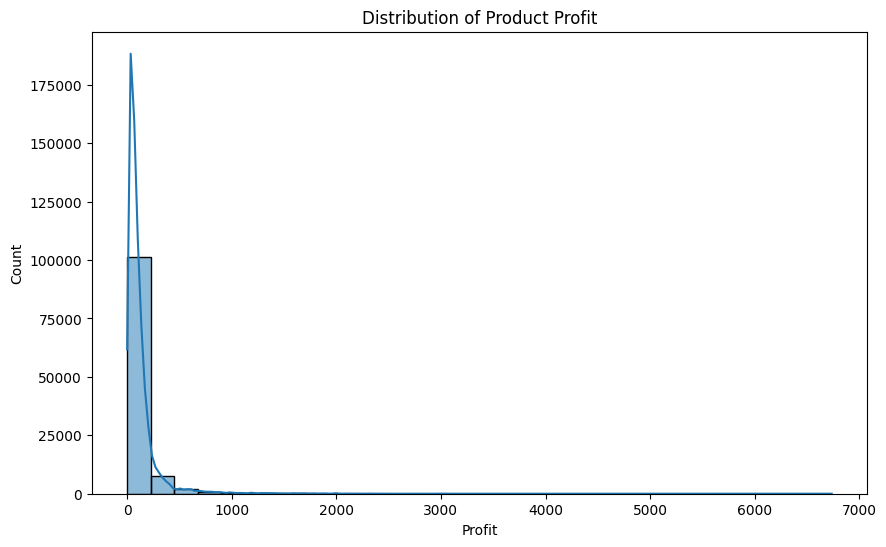

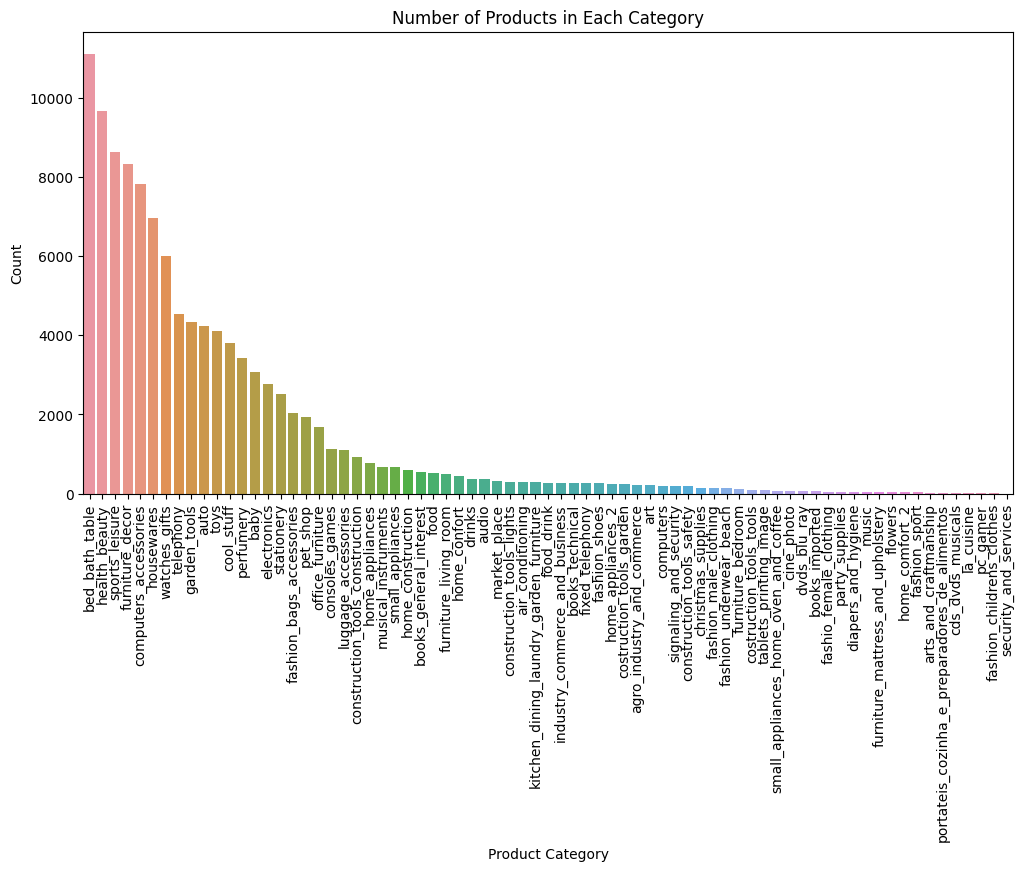

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='profit', bins=30, kde=True)
plt.title("Distribution of Product Profit")
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='product_category_name', order=merged_df['product_category_name'].value_counts().index)
plt.title("Number of Products in Each Category")
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

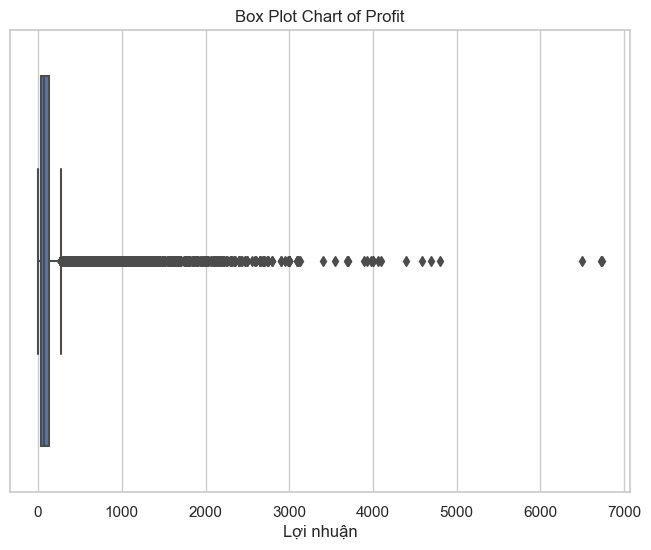

In [7]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.boxplot(x=merged_df['profit'])

plt.title('Box Plot Chart of Profit')
plt.xlabel('Lợi nhuận')

plt.show()

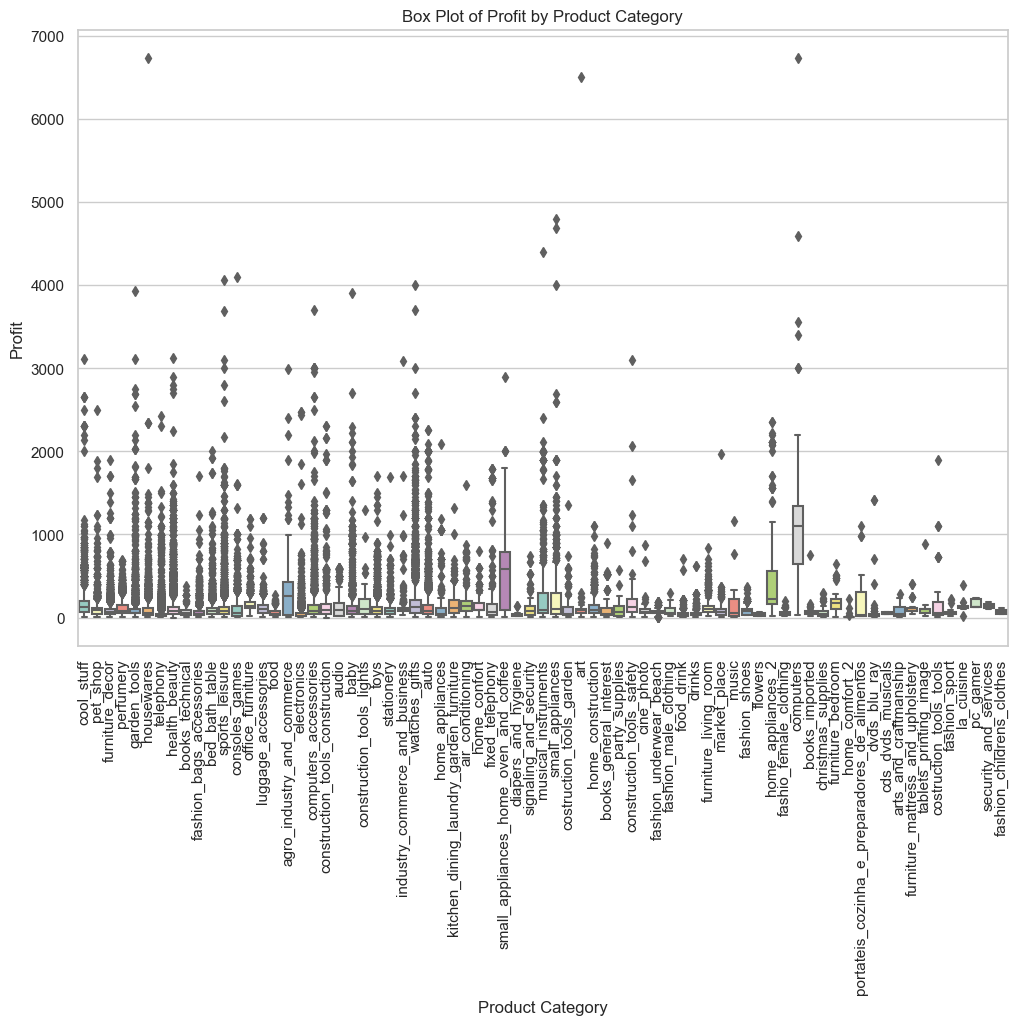

In [8]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(x='product_category_name', y='profit', data=merged_df, palette='Set3')

plt.title('Box Plot of Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')

plt.xticks(rotation=90)  
plt.show()


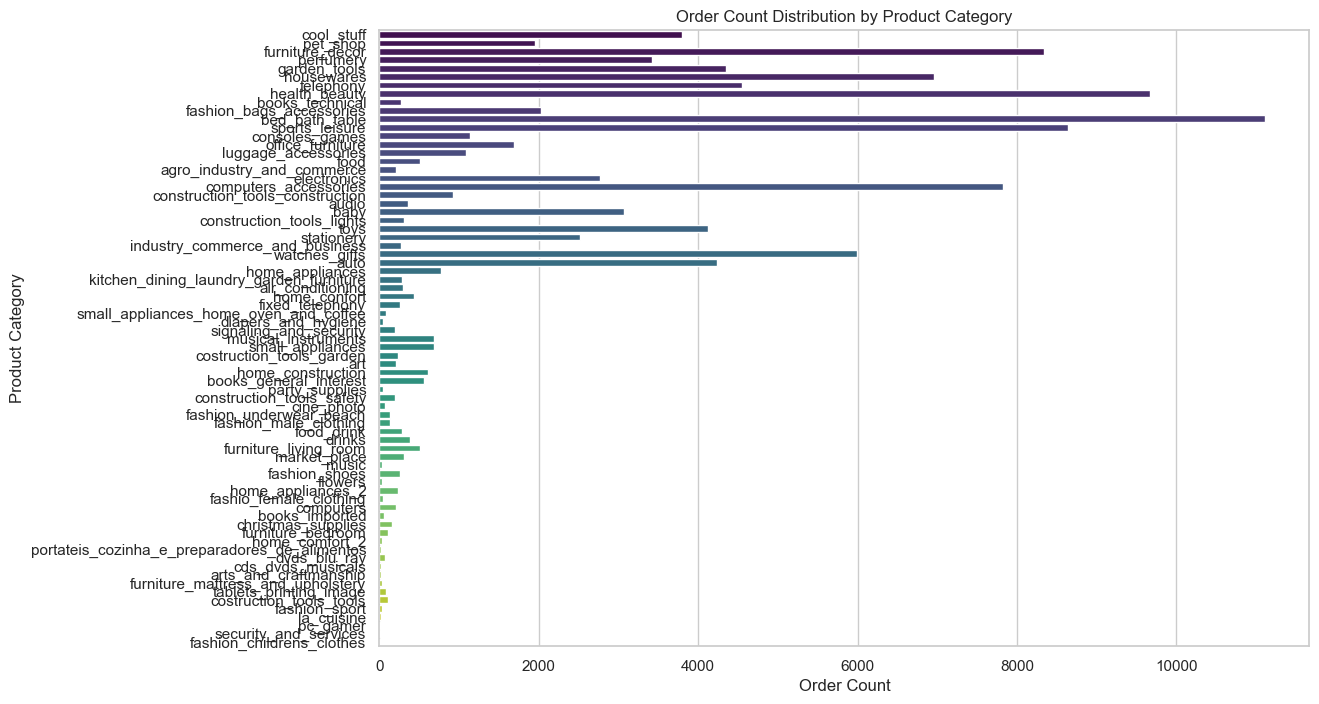

In [9]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.countplot(y='product_category_name', data=merged_df, palette='viridis')

plt.title('Order Count Distribution by Product Category')
plt.xlabel('Order Count')
plt.ylabel('Product Category')

plt.show()

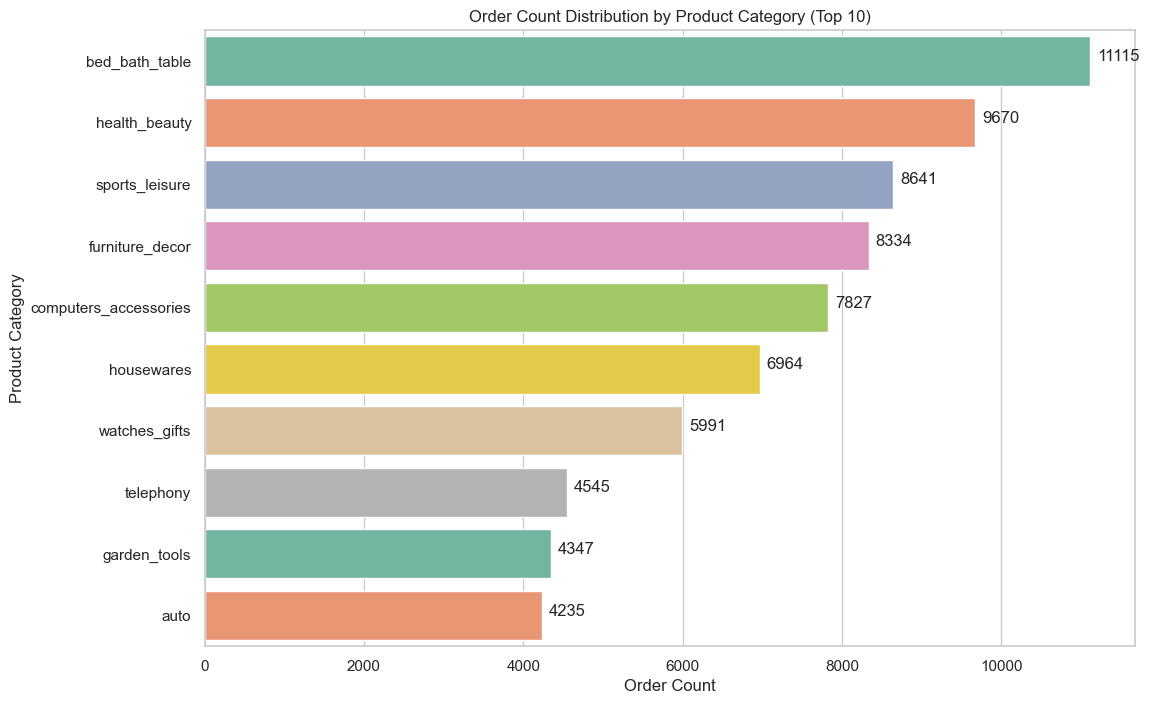

In [10]:
category_order_count = merged_df['product_category_name'].value_counts().reset_index()
category_order_count.columns = ['product_category_name', 'order_count']

category_order_count = category_order_count.sort_values(by='order_count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(x='order_count', y='product_category_name', data=category_order_count.head(10), palette='Set2')

plt.title('Order Count Distribution by Product Category (Top 10)')
plt.xlabel('Order Count')
plt.ylabel('Product Category')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points')

plt.show()

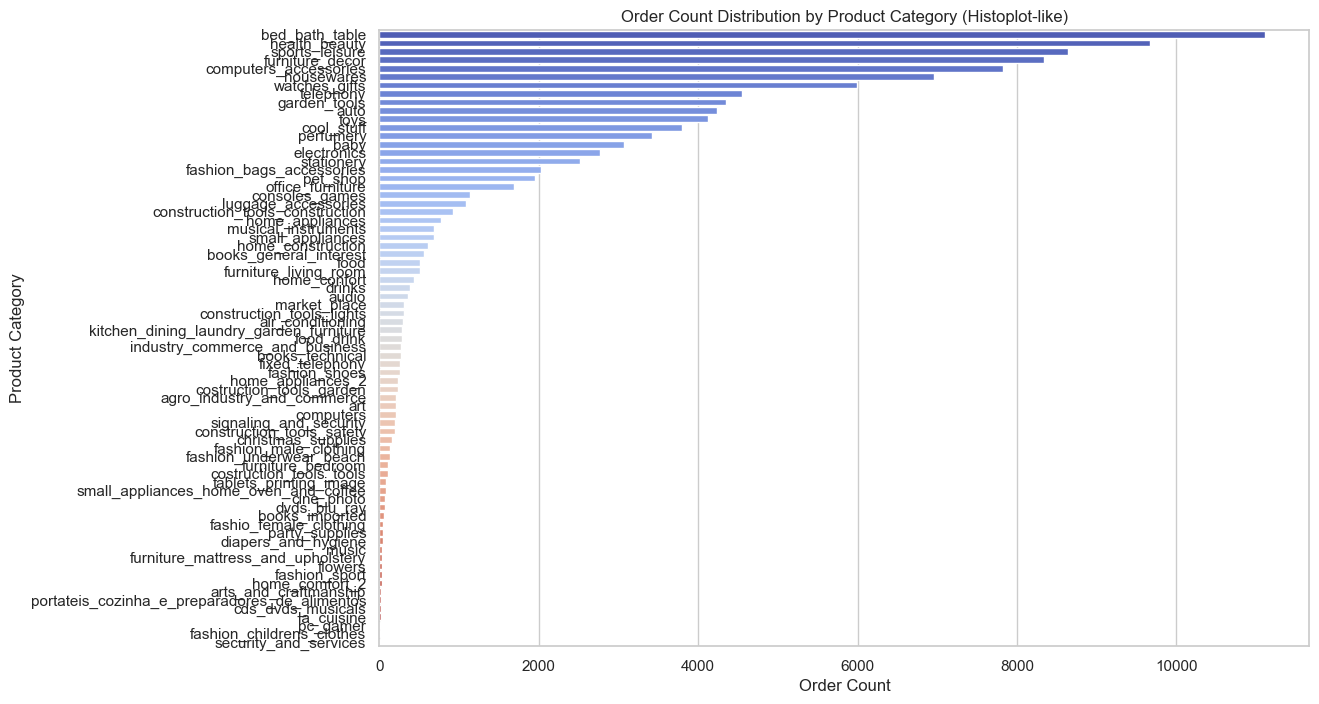

In [11]:
category_order_count = merged_df['product_category_name'].value_counts().reset_index()
category_order_count.columns = ['product_category_name', 'order_count']

category_order_count = category_order_count.sort_values(by='order_count', ascending=False)

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='order_count', y='product_category_name', data=category_order_count, palette='coolwarm')

plt.title('Order Count Distribution by Product Category (Histoplot-like)')
plt.xlabel('Order Count')
plt.ylabel('Product Category')

plt.show()

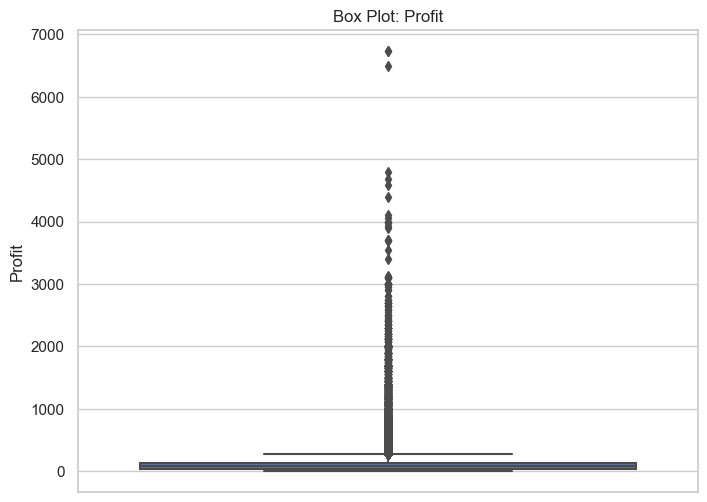

In [12]:
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6)) 

sns.boxplot(y='profit', data=merged_df)

plt.ylabel('Profit')
plt.title('Box Plot: Profit')

plt.show()


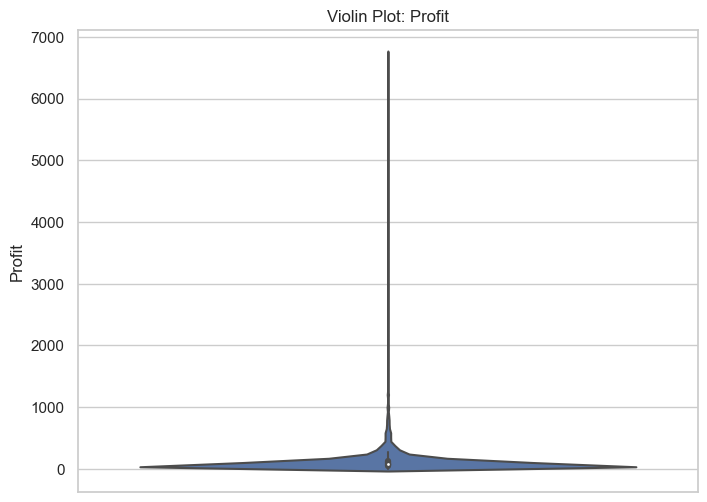

In [13]:
sns.set(style="whitegrid") 
plt.figure(figsize=(8, 6)) 

sns.violinplot(y='profit', data=merged_df)

plt.ylabel('Profit')
plt.title('Violin Plot: Profit')

plt.show()


## The top 10 product categories (product_category_name) with the highest profit

In [14]:
top_categ_by_profit= merged_df.groupby("product_category_name").agg({'order_id':'nunique','profit':'sum'}).sort_values("profit", ascending=False)[:10]
top_categ_by_profit.rename(columns={"order_id":"Quantity", "profit":"Profit Total"}, inplace=True)
top_categ_by_profit

,Quantity,Profit Total
product_category_name,,
health_beauty,8836,1258681.34
watches_gifts,5624,1205005.68
bed_bath_table,9417,1036988.68
sports_leisure,7720,988048.97
computers_accessories,6689,911954.32
furniture_decor,6449,729762.49
cool_stuff,3632,635290.85
housewares,5884,632248.66
auto,3897,592720.11


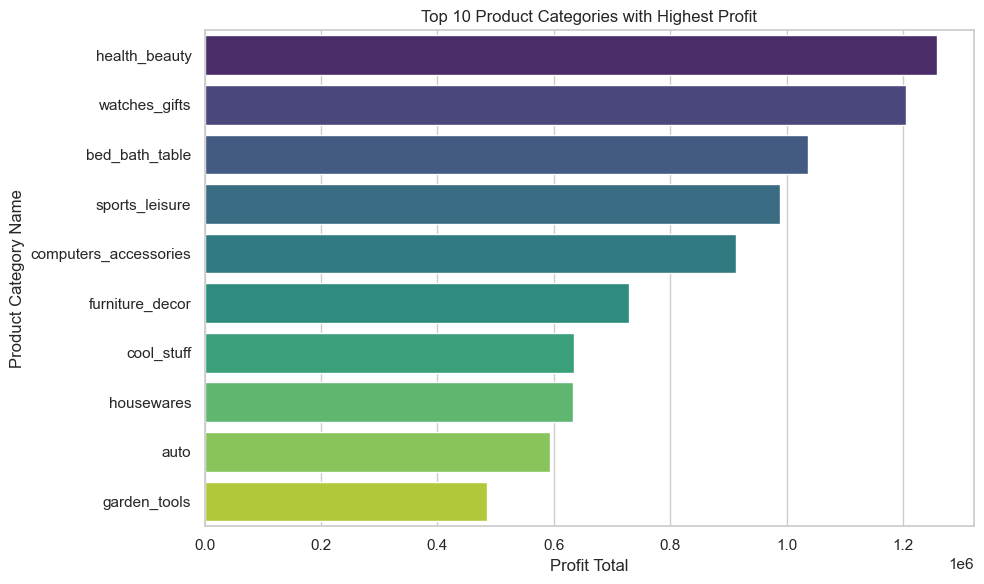

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

top_categ_by_profit = top_categ_by_profit.sort_values("Profit Total", ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x="Profit Total", y=top_categ_by_profit.index, data=top_categ_by_profit, palette="viridis")

plt.xlabel("Profit Total")
plt.ylabel("Product Category Name")
plt.title("Top 10 Product Categories with Highest Profit")
plt.tight_layout()

plt.show()


## The top 10 product categories (product_category_name) with the lowest profit

In [16]:
top_categ_by_profit= merged_df.groupby("product_category_name").agg({'order_id':'nunique','profit':'sum'}).sort_values("profit", ascending=True)[:10]
top_categ_by_profit.rename(columns={"order_id":"Quantity", "profit":"Profit Total"}, inplace=True)
top_categ_by_profit

,Quantity,Profit Total
product_category_name,,
security_and_services,2,283.29
fashion_childrens_clothes,8,569.85
cds_dvds_musicals,12,730.00
home_comfort_2,24,760.27
flowers,29,1110.04
pc_gamer,8,1545.95
diapers_and_hygiene,27,1567.59
arts_and_craftmanship,23,1814.01
la_cuisine,13,2054.99


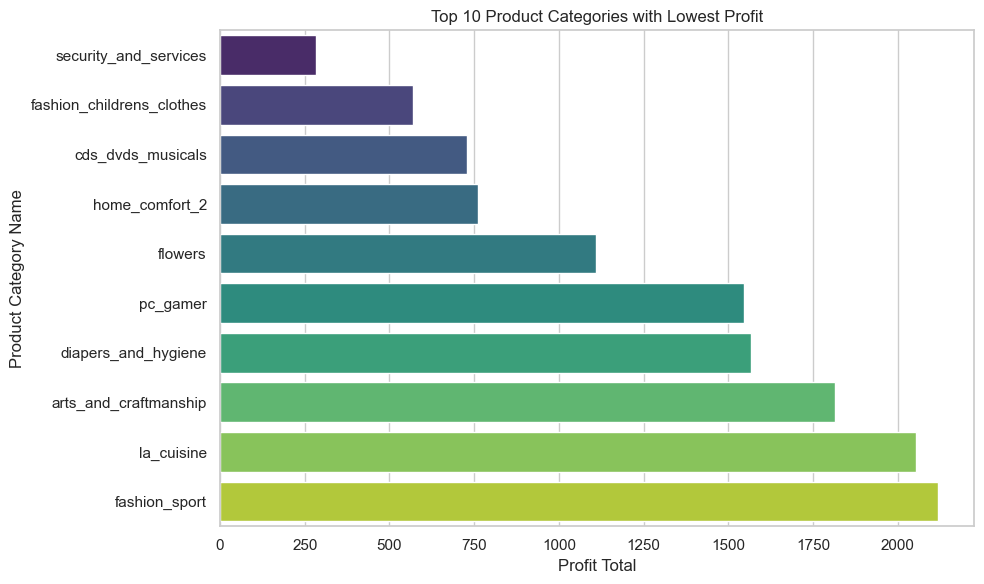

In [17]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Sort the DataFrame in ascending order by 'Profit Total' to display lowest profit first
top_categ_by_profit = top_categ_by_profit.sort_values("Profit Total", ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Profit Total", y=top_categ_by_profit.index, data=top_categ_by_profit, palette="viridis")

# Customize the plot
plt.xlabel("Profit Total")
plt.ylabel("Product Category Name")
plt.title("Top 10 Product Categories with Lowest Profit")
plt.tight_layout()

# Display the plot
plt.show()
